# Capstone Project: Providing Data-Driven Suggestions for HR

## Understand the Business Scenario and Problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

## Data Dictionary

The dataset contains 15,000 rows and 10 columns for the variables listed below.

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Imports and Load Data

In [43]:
# Import packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)
sns.set_theme()
sns.set_palette('colorblind')

In [4]:
# Load dataset into a dataframe
df = pd.read_csv('data/HR_capstone_dataset.csv')

# Display first few rows of the dataframe
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data Exploration (Initial EDA and Data Cleaning)

In [5]:
# Gather basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
# Gather descriptive statistics about the data
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename Columns

In [7]:
# Display all column names
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
# Change columns to lower case
df.columns = df.columns.str.lower()

# Rename columns
df = df.rename(columns={'number_project': 'number_of_projects',
                        'average_montly_hours':'average_monthly_hours',
                        'time_spend_company': 'tenure'})

# Display all column names after the update
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_of_projects',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check Missing Values

In [9]:
# Check for missing values
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_of_projects       0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check Duplicates

In [10]:
# Check for duplicates
df.duplicated().sum()

3008

In [11]:
# Inspect some duplicated rows
df[df.duplicated(keep=False)].sort_values(['satisfaction_level','last_evaluation']).head(10)

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
30,0.09,0.62,6,294,4,0,1,0,accounting,low
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
71,0.09,0.77,5,275,4,0,1,0,product_mng,medium
652,0.09,0.77,6,290,4,0,1,0,technical,medium
12071,0.09,0.77,5,275,4,0,1,0,product_mng,medium
12652,0.09,0.77,6,290,4,0,1,0,technical,medium
14282,0.09,0.77,5,275,4,0,1,0,product_mng,medium
14863,0.09,0.77,6,290,4,0,1,0,technical,medium
278,0.09,0.78,6,254,4,0,1,0,support,low


In [12]:
# Drop duplicates and save resulting dataframe in a new variable
df_no_dups = df.drop_duplicates()

# Display first few rows of new dataframe
df_no_dups.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [13]:
df_no_dups.dtypes

satisfaction_level       float64
last_evaluation          float64
number_of_projects         int64
average_monthly_hours      int64
tenure                     int64
work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

### Check Outliers

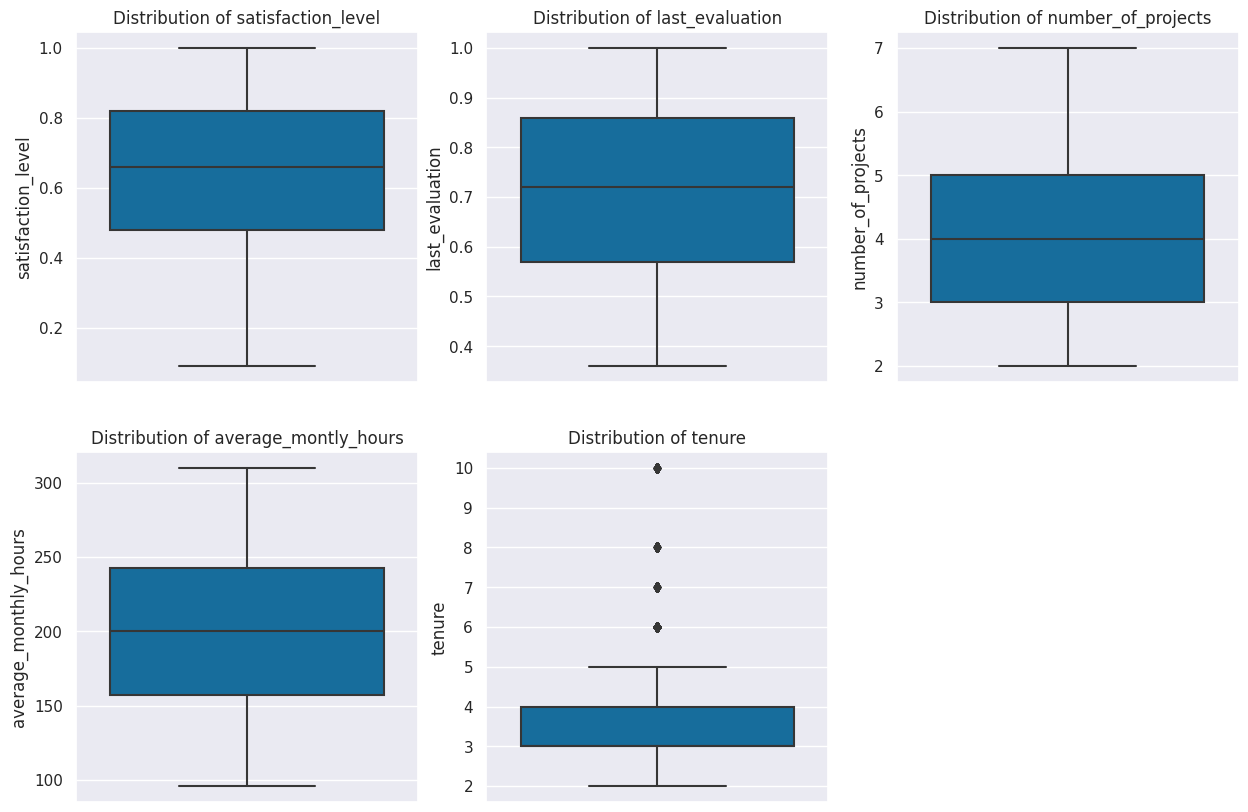

In [14]:
# Create multiple boxplots to visualize distribution of variables
fig, axes = plt.subplots(2, 3, figsize=(15,10))
# Hide the 6th plot because we only need 5
axes[1][2].set_visible(False) 

# Boxplot of `satisfaction_level`
sns.boxplot(data=df_no_dups, y='satisfaction_level', ax=axes[0,0])
axes[0,0].set_title('Distribution of satisfaction_level')
# Boxplot of `last_evaluation`
sns.boxplot(data=df_no_dups, y='last_evaluation', ax=axes[0,1])
axes[0,1].set_title('Distribution of last_evaluation')
# Boxplot of `number_of_projects`
sns.boxplot(data=df_no_dups, y='number_of_projects', ax=axes[0,2])
axes[0,2].set_title('Distribution of number_of_projects')
# Boxplot of `average_monthly_hours`
sns.boxplot(data=df_no_dups, y='average_monthly_hours', ax=axes[1,0])
axes[1,0].set_title('Distribution of average_montly_hours')
# Boxplot of `tenure`
sns.boxplot(data=df_no_dups, y='tenure', ax=axes[1,1])
axes[1,1].set_title('Distribution of tenure')

plt.show()

From the above boxplots, only the `tenure` variable shows presence of outliers.

However, `average_monthly_hours` doesn't seem to have outliers which is surprising because 250-300 hours per monthly sounds pretty crazy. Assuming you work 40 hours per week and two weeks of vacation per year, the average monthly hours would be = 50 weeks * 40 hours per week / 12 months = 166.67 hours per month. Working 250-300 hours per month definitely counts as overworking but it's not an outlier according to the boxplot. This could mean that a lot of employees are overworked and we should investigate this further in later EDA.

In [15]:
# Determine the number of outliers in `tenure`
q1 = np.quantile(df['tenure'], q=0.25)
q3 = np.quantile(df['tenure'], q=0.75)
iqr = q3 - q1
lower_limit = q1 - (1.5*iqr)
upper_limit = q3 + (1.5*iqr)
num_of_outliers = len(df_no_dups[(df_no_dups['tenure']<lower_limit) | (df_no_dups['tenure']>upper_limit)])

print(f'Lower limit = {lower_limit}\nUpper limit = {upper_limit}\nNumber of outliers in the `tenure` column = {num_of_outliers}')

Lower limit = 1.5
Upper limit = 5.5
Number of outliers in the `tenure` column = 824


💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Data Exploration (Continue EDA)

In [16]:
# Get numbers of people who left vs. stayed
print(df_no_dups['left'].value_counts())
print()

# Get percentages of people who left vs. stayed
print(df_no_dups['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


### Data Visualizations

#### Correlation Matrix

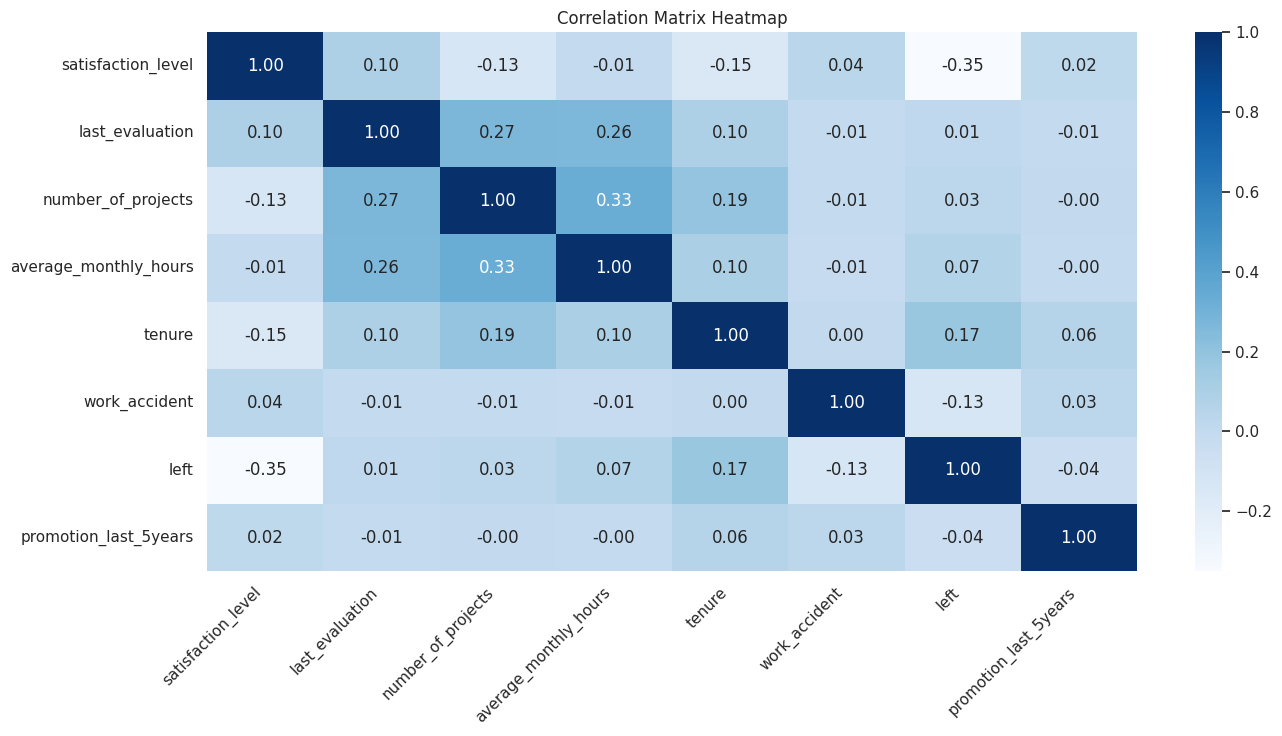

In [19]:
# Create a correlation matrix heatmap to visualize the relationship between variables
fig, ax = plt.subplots(figsize=(15,7))

g = sns.heatmap(df_no_dups.corr(numeric_only=True), annot=True, fmt='.2f', cmap='Blues', ax=ax)
ax.set_title('Correlation Matrix Heatmap')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

With the correlation matrix and the finding from the initial EDA, there is some questions I'd like to answer/investigate while comparing it to the variable `left`:

- `average_monthly_hours` have a weak positive correlation with `number_of_project` and seems like working long hours might be normal from the initial EDA, does these two variable have an impact on `left`?
- `average_monthly_hours` have a weak positive correlation with `last_evaluation`. Does working more hours lead to higher evaluation?
- `average_monthly_hours` doesn't seem to correlate with `satisfaction_level` which is interesting to investigate further.
- How many employees left in each department?
- `promotion_last_5years` only correlates slightly with `tenure`? Need to investigate this further.

#### `average_monthly_hours` and `number_project`'s Impact on `left`

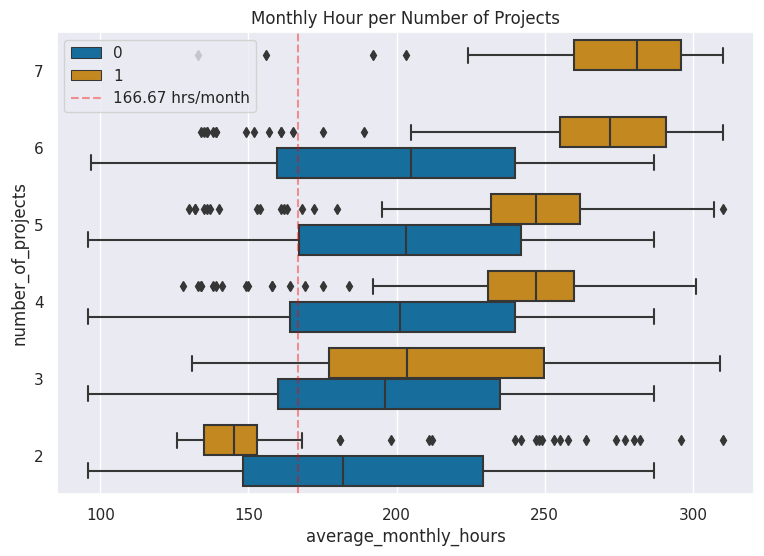

In [20]:
# Create a boxplot to explore `average_monthly_hours` distributions per `number_of_project` and compare employees who left and who stayed 
fig, ax = plt.subplots(figsize=(9,6))

sns.boxplot(data=df_no_dups, x='average_monthly_hours', y='number_of_projects', hue='left', orient="h", ax=ax)
ax.invert_yaxis()
ax.axvline(x=166.67, color='red', alpha=0.4, label='166.67 hrs/month', ls='--')
ax.legend(loc=0)
ax.set_title('Monthly Hour per Number of Projects')

plt.show()

From the boxplot above, there are some interesting trends. The employees that stayed seems to worked similar average monthly hours regardless of the number of projects.

We can also see that there are two groups of employees that left the company.

- Group A: Those who worked less than their coworkers with same amount of projects.
    - Employees in this group likely got fired or started to work less when they are about to quit.
- Group B: Those who worked a lot more hours.
    - Employees in this group left mostly likely due to being overworked.

Note that every employee that worked on 7 projects left the company. We can investigate this further.

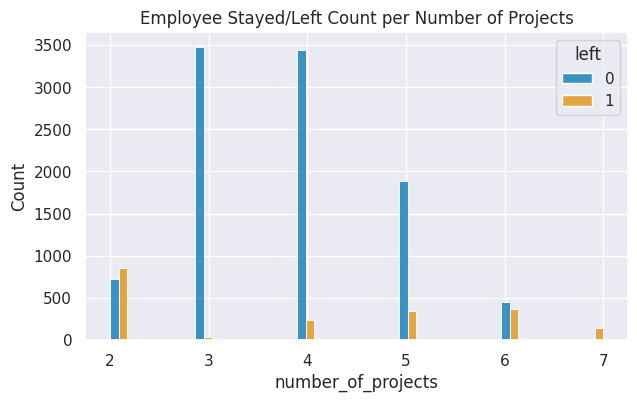

In [21]:
# Create a histogram showing number of employees who stayed versus those who left per number of projects
fig, ax = plt.subplots(figsize=(7,4))

sns.histplot(data=df_no_dups, x='number_of_projects', hue='left', multiple='dodge', ax=ax)
ax.set_title('Employee Stayed/Left Count per Number of Projects')

plt.show()

Seems like the optimal number of projects for employees to work on is 3 or 4 since the ratio of left/stayed is small.

#### `average_monthly_hours` vs `last_evaluation`

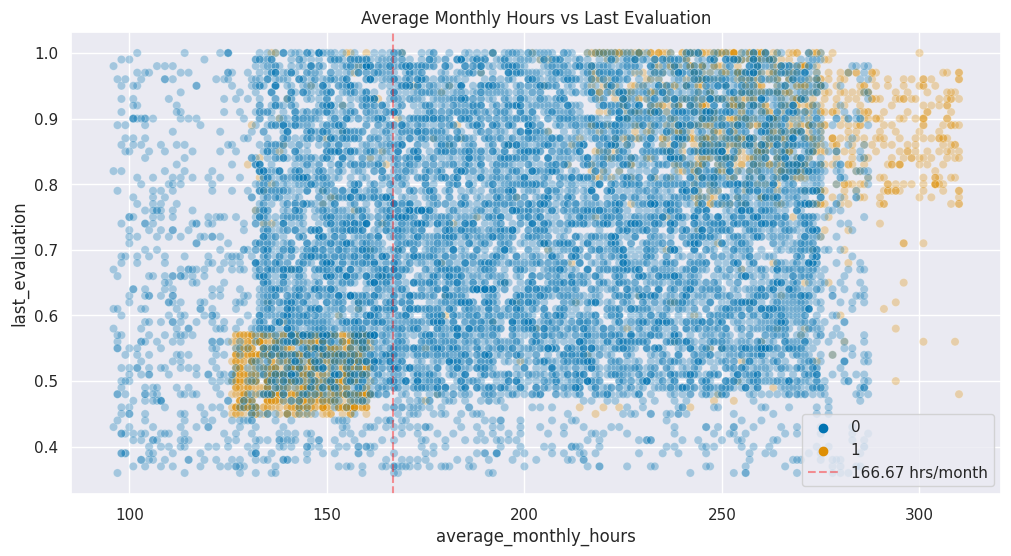

In [22]:
# Create a scatterplot of `average_monthly_hours` vs `last_evaluation` and compare employees who left and who stayed
fig, ax = plt.subplots(figsize=(12,6))

sns.scatterplot(data=df_no_dups, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.3, ax=ax)
ax.axvline(x=166.67, color='red', alpha=0.4, label='166.67 hrs/month', ls='--')
ax.legend(loc=0)
ax.set_title('Average Monthly Hours vs Last Evaluation')

plt.show()

From the scatterplot above, there seems to be some relationship between `average_monthly_hours` and `last_evaluation` but working long hours doesn't necessarily guarantee good evaluation.

We can also see two groups of employees that left the company:
- Group A: Those who worked around the average 166.67 hours per month with 0.5 `last_evaluation`.
    - It's not exactly clear why employees this group left the company. It might be because of the low evaluation which discouraged them even though they are working normal amount of work hours.
- Group B: Those who worked ~210-320 average hours per month with 0.8-1.0 `last_evaluation`.
    - Employees in this group worked long hours and have high evaluation which is to be expected. However, this group of employee left the company probably due to burnout in the long term.

#### `average_monthly_hours` vs `satisfaction_level`

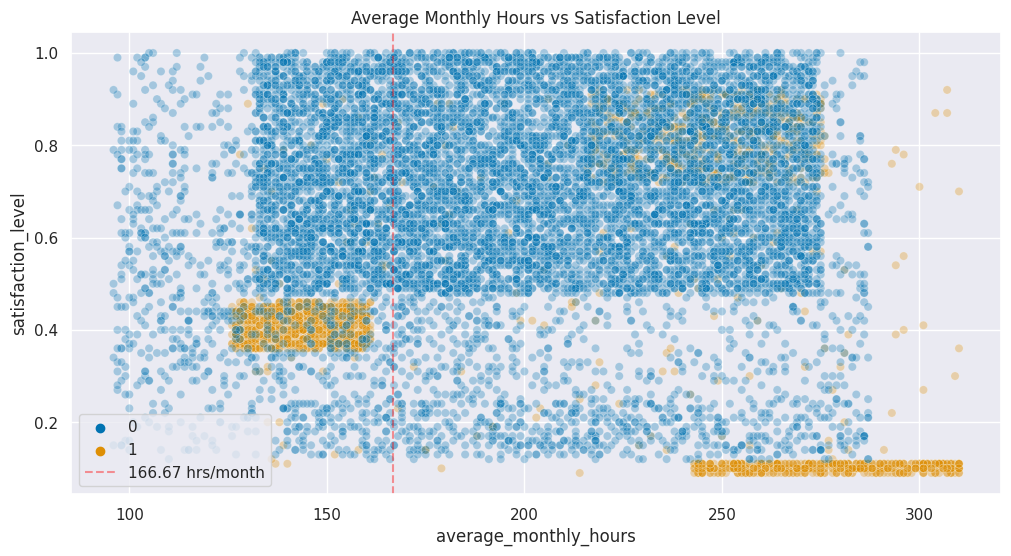

In [23]:
# Create a scatterplot of `average_monthly_hours` vs `last_evaluation` and compare employees who left and who stayed
fig, ax = plt.subplots(figsize=(12,6))

sns.scatterplot(data=df_no_dups, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.3, ax=ax)
ax.axvline(x=166.67, color='red', alpha=0.4, label='166.67 hrs/month', ls='--')
ax.legend(loc=0)
ax.set_title('Average Monthly Hours vs Satisfaction Level')

plt.show()

From the scatterplot above, we can see three groups of employees that left the company:

- Group A: Those who worked an average of ~240-320 hours per month with ~0.1 satisfaction level.
    - This group of employees probably left due to being overworked.
- Group B: Those who worked around the average 166.67 hours per month with 0.4 satisfaction level.
    - It's unclear why this group of employees left. It could be because there is pressure for them to work more since their many of their peer worked long hours. This pressure could lower satisfaction level.
- Group C: Those who worked an average of ~220-280 hours per month with 0.8 satisfaction level.
    - This group of employees probably felt satisfied while contributing/completing their project but left due to burnout in the long term caused by long working hours.

#### Stayed/Left Count per Department

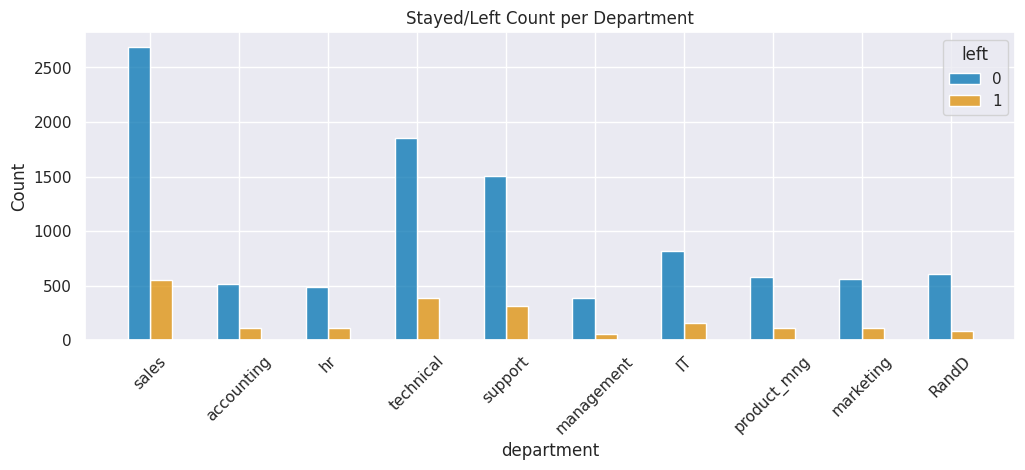

In [24]:
# Create a barplot of employees who left and who stayed per department
fig, ax = plt.subplots(figsize=(12,4))

sns.histplot(data=df_no_dups, x='department', hue='left', multiple='dodge', shrink=0.5, ax=ax)
ax.set_title('Stayed/Left Count per Department')
plt.xticks(rotation=45)

plt.show()

The proportion of employees who left to those who stayed seems consistent across the departments.

## Build Model

Goal: To predict whether an employee leaves the company or not.

There is two types of errors we need to consider:

- False positives: When the model predicts the employee **will** leave the company but didn't leave.
- False negatives: When the model predicts the employee **will not** leave the company but did leave.

The consequence for false positive is small. The consequence for false negative is costly because the company would then need to rehire more employees.

Therefore, I will try to minimize the false negative which means to maximize the recall score.

### Feature Engineering

In [25]:
df_no_dups.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [26]:
# Dummy encode the `department` column
df_final = pd.get_dummies(df_no_dups, columns=['department'], drop_first=False)
df_final.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,low,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,medium,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,medium,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,low,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,low,False,False,False,False,False,False,False,True,False,False


In [27]:
# Convert `salary` to category
df_final['salary'] = df_final['salary'].astype('category')

# Encode the `salary` column as ordinal numeric category
df_final['salary'] = df_final['salary'].cat.set_categories(['low', 'medium', 'high']).cat.codes

df_final.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


Next, we need to address data leakage. Data leakage is when you use data to train your model that should not be used during training, either because it appears in the test data or because it's not data that you'd expect to have when the model is actually deployed.

Therefore, we need to drop `satisfaction_level` column because we won't expect to have all employees satisfaction level when the model is deployed. We also need to drop `average_monthly_hours` because if an employee has already decided to quit, or has already been identified by management as people to be fired, he/she might work fewer hours.

In [28]:
# Drop `satisfaction_level` column
df_final = df_final.drop('satisfaction_level', axis=1)

In [29]:
# Drop `average_monthly_hours` but create a column to indicate if the employee overworked or not
# Employee is overworked if he/she is working more than average of 175 hours per month compare to the normal amount of 166.67 per month
df_final['overworked'] = (df_final['average_monthly_hours']>175).astype(int)

In [30]:
df_final = df_final.drop('average_monthly_hours', axis=1)
df_final.head()

,last_evaluation,number_of_projects,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0
1,0.86,5,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False,1
2,0.88,7,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False,1
3,0.87,5,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False,1
4,0.52,2,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0


### Define Feature and Response Variable

In [31]:
X = df_final.drop(['left'], axis=1)
y = df_final['left']

### Split Data

In [32]:
# Split data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Build Random Forest

In [33]:
rf = RandomForestClassifier(random_state=42)

cv_params = {'n_estimators':[50, 100, 200],
             'max_features':['sqrt', 'log2', 0.6, 0.8]}

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')

In [34]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: user 37.2 s, sys: 20.4 ms, total: 37.2 s
Wall time: 37.2 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_features': ['sqrt', 'log2', 0.6, 0.8],
                         'n_estimators': [50, 100, 200]},
             refit='recall',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [35]:
# Examine best recall score
rf_cv.best_score_

0.8625165118984247

In [36]:
# Examine best parameters
rf_cv.best_params_

{'max_features': 0.6, 'n_estimators': 200}

In [37]:
# Get all the results from the CV and put them in a df
rf_results = pd.DataFrame(rf_cv.cv_results_)

# Isolate the row with the max mean recall score
rf_best_estimator_results = rf_results.iloc[rf_results['mean_test_recall'].idxmax()].to_frame(name='Random Forest CV').transpose()
rf_best_estimator_results = rf_best_estimator_results[['mean_test_accuracy', 'mean_test_precision',
                                                       'mean_test_recall', 'mean_test_f1', 'mean_test_roc_auc']]

rf_best_estimator_results

,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1,mean_test_roc_auc
Random Forest CV,0.960383,0.895342,0.862517,0.878482,0.960202


## Evaluate Model

In [38]:
# Get model prediction using X_train
y_pred = rf_cv.best_estimator_.predict(X_test)

In [61]:
# Get accuracy, precision, recall, f1, and roc score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy:.2f}')

precision = precision_score(y_test, y_pred)
print(f'Precision Score: {precision:.2f}')

recall = recall_score(y_test, y_pred)
print(f'Recall Score: {recall:.2f}')

f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')

roc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC Score: {roc:.2f}')

Accuracy Score: 0.96
Precision Score: 0.89
Recall Score: 0.88
F1 Score: 0.89
ROC AUC Score: 0.93


#### Confusion Matrix

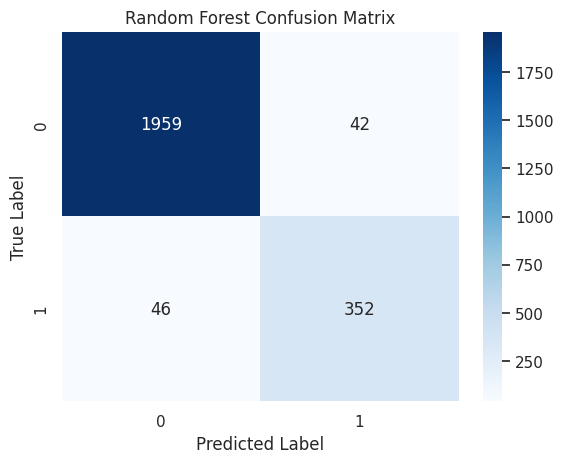

In [54]:
# Compute values for confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create display of confusion matrix
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_title('Random Forest Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

plt.show()

The confusion matrix shows the model misclassified:

- 46 labels as stay but should be leave.
- 42 labels as leave but should be stay

#### Feature Importance

In [50]:
# Get feature importance
importances = rf_cv.best_estimator_.feature_importances_
importances = pd.Series(importances, index=X_train.columns).to_frame(name='importance').sort_values('importance',ascending=False)
importances[:5]

,importance
last_evaluation,0.301849
number_of_projects,0.290053
tenure,0.229064
overworked,0.092267
salary,0.024498


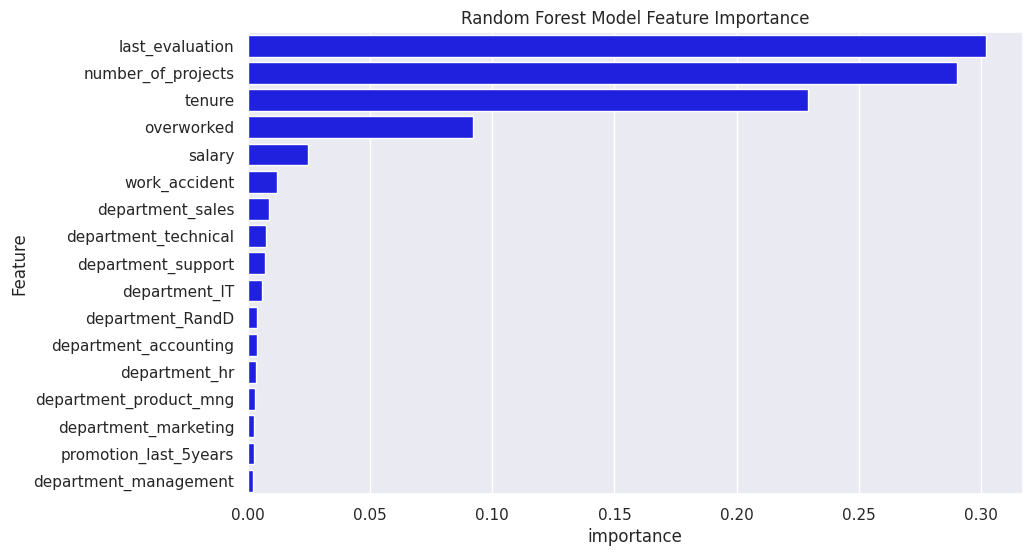

In [57]:
# Plot feature importance
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(data=importances, x='importance', y=importances.index, color='blue', ax=ax)
ax.set_title('Random Forest Model Feature Importance')
ax.set_ylabel('Feature')

plt.show()

`last_evaluation`, `number_of_project`, `tenure`, and `overworked` are the top 4 most predictive features.

## Model Results

Even without `satisfaction_level` and `average_monthly_hours` details, the random forest model still achieved very good results:
- Accuracy = 0.96
- Precision = 0.89
- Recall = 0.88
- F1 = 0.89
- ROC AUC = 0.93 

## Conclusion

The EDA and the model shows that employees are overworked and long working hours doesn't offer equivalent benefits in return.

To retain employees, here are my recommendations:

- Cap the number of projects that employees can work on to 3 or 4.
- If working overtime is a requirement, make sure to inform your employees about this.
- Provide overtime pay/benefits/other rewards.
- Design a fair evaluation metrics that is not tied to work hours. In other words, evaluation shouldn't be reserved for employees who work 200+ hours per month.

## Next Step

The model indicates that `last_evaluation` is the most predictive feature but it might be a data leakage if evaluations aren't performed very frequently. If that's case, then another model might be needed to predict employee retention without the `last_evaluation` feature.

Since `last_evaluation` is the most predictive feature, it might also mean that it determines whether an employee leaves or stays. Therefore, the next step could be to build a model that predicts `last_evaluation` and use the predicted value to fit the model created in this notebook to get rid of the concern of data leakage.